# Klasyfikacja stopnia sukcesu filmu

## Autorzy

Ilya Pauliuk (217344), Adam Ropelewski (217518), Dawid Rychlik (217264), Jakub
Szala (217367)

## Streszczenie

Wykonany przez nas projekt zajmuję się klasyfikacją filmów ze względu na spodziewaną ocenę przez ich odbiorców. W tym celu wykorzystujemy sprawdzone metody klasyfikacji, które mają swoje implementację w bibliotece scikit-learn. Wymagało to dokładnej obróbki danych. 

[dopisać lekkie wnioseki na podstawie wyniku]

## Słowa kluczowe

Filmy, netflix, klasyfikacja metodami x i d, klasteryzacja metodą k-średnich

## Wprowadzenie

W latach osiemdziesiątych obejrzenie filmu wymagało wizyty w kinie lub ograniczenie się do reperteuru proponowanego przez telewizję. W erze, gdy kino było jeszcze ekscytującą nowością, każdy postęp w dziedzinie kinematografii czy to w reżyserii czy w efektach specjalnych sprawiał, że dzieło utrwalało się pozytywnie w pamięci widzów. Te czasy jednak minęły, a coraz to bardziej ekstrawaganckie elementy dokonywane w postprodukcji nie robią już tak dużego wrażenia.


 Teraz dostęp do popkultury jest na wyciągnięcie ręki, kilka kliknięć pozwala nam przeglądać niezliczone biblioteki serwisów streamingowych takich jak Netflix, Max, Hulu, Disney+ etc. Jesteśmy zasypywani rzeszami filmów, wiele z nich zapominamy po tygodniu. Określenie czy dane dzieło kina wzbudzi w przeciętnym odbiorcy pozytywną reakcję, tym samym zasługując by dana platforma go zakupiła jest zadaniem niełatwym. W dodatku biorąc pod uwagę dotychczasową ilość stworzonych ekranizacji i tworzonych co roku - czasochłonynym. 

W celu stworzenia modelu statystycznego wykorzystujemy dane około 26 mln ocen poszczególnych użytkowników platformy Netflix. W owych danych pojawiły się liczne braki wymagające obsłużenia. 

Po przetworzeniu danych zajeliśmy się klasteryzacją przy pomocy metody k-średnich, testując jakie parametry tej metody będą najkorzystniejsze

## Opis danych wejściowych

Dane pozyskaliśmy z serwisu keggel. 26 mln ocen poszczególnych użytkowników platformy Netflix należało zsumować i przydzielić do konkretnych filmów, obliczając średnią. Kluczowym zadaniem było obsłużenie danych brakujących, funkcje biblioteki scikit-learn nie pozwalają na zbiory danych, w których nie ma wszystkich wartości.

W ten sposób uzyskaliśmy dane wyjściowe, które możemy wykorzystać do treningu modelu statystycznego. Każdy film posiada jedenaście cech:

1. Średnia ocena użytkowników
2. Czy to film dla dorosłych
3. Budżet
4. Gatunek
5. Język orginału
6. Data premiery
7. Przychód
8. Ilość dubbingów
9. Czas trwania
10. Kraje produkcji
11. Liczba głosów

### Średnia ocena użytkowników

To wartość liczbowa reprezentująca przeciętną ocenę przyznaną filmowi przez użytkowników na platformie Netflix. Skala wynosi od 0 do 5. Wysoka średnia ocena zazwyczaj przekłada się na pozytywne przyjęcie filmu przez publiczność.

### Czy to film dla dorosłych

Zmienna binarna (tak/nie), która wskazuje, czy film został sklasyfikowany jako przeznaczony wyłącznie dla dorosłych (np. ze względu na treści erotyczne, przemoc, itp.). Zakres wartości: 0 (nie), 1 (tak).

### Budżet

Całkowity koszt produkcji filmu, podany w walucie (najczęściej w dolarach amerykańskich). Zakres wartości: od tysięcy do setek milionów dolarów. Budżet potrafi wpłynąć znacząco na sukces wśród widowni, choć wiele klasyków kina pokazało, że i z niskim budżetem można wywrzeć wrażenie na publiczności. 

### Gatunek

Kategoria tematyczna filmu (np. komedia, dramat, horror, science fiction). Zakres wartości: jeden lub więcej z kilkunastu gatunków filmowych. Można się spodziewać, że pewne gatunki przyciągają większą widownię. 

### Język oryginału

Język, w którym film został pierwotnie nakręcony i wyprodukowany. Zakres wartości: id języka będące liczbą całkowitą dodatnią. Filmy, których orginalny język jest popularny na świecie jak angielski, chiński czy hiszpański zazwyczaj trafiają do większej ilości odbiorców. 

### Data premiery

Dokładna data, kiedy film został po raz pierwszy wyświetlony publicznie. Zakres wartości: format daty (YYYY-MM-DD). Istnieją okresy, w których filmy danej epoki wracają do popularności. 

### Przychód

Całkowity dochód wygenerowany przez film z biletów kinowych i innych źródeł, podany w walucie (najczęściej w dolarach amerykańskich). Zakres wartości: od tysięcy do miliardów dolarów. Przychód jest wskaźnikiem komercyjnego sukcesu filmu, zazwyczaj przekłada się na ocenę filmu.

### Ilość dubbingów

Liczba różnych języków, na które film został przetłumaczony. Zakres wartości: może wynosić od 0 do kilkudziesięciu. Dubbing pozostaje jedną z najbardziej popularnych form odbioru firmu przez obcokrajowców. 

### Czas trwania

Całkowity czas trwania filmu, podany w minutach. Zakres wartości: od około 20 minotwych do nawet ponad 200 minut. Czas trwania bezpośrednio ma spory wpływ na recenzje, filmy stanowczo za długie stają się nużące bez dobrego reżysera, a za krótkie dają uczucie dysatysfkacji. 

### Kraje produkcji

Lista krajów, które brały udział w produkcji filmu. Zakres wartości: jeden lub więcej krajów.

### Liczba głosów

Całkowita liczba ocen oddanych przez użytkowników na platformach recenzujących. Zakres wartości: może wynosić od kilku do milionów. Większa liczba głosów przekłada się na popularność i wiarygodność średniej oceny filmu.

## Wizualizacja danych

Do wizualizacji danych, używamy biblioteki pyplot i seaborn.

#### Importowanie bibliotek i danych z pliku .csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "output/movies_relevant_data.csv"
movies_df = pd.read_csv(file_path)


numerical_columns = [
    #"movieId",
    "avg_of_rating",
    #"adult",
    "budget",
    #"genres",
    "original_language",
    "release_date",
    "revenue",
    #"spoken_languages",
    "runtime",
    "production_countries",
    "vote_count",
]

# polskie nazwy kolumn
polish_column_names = [
    #"Identyfikator filmu",
    "średnich ocen",
    #"Film dla dorosłych",
    "budżetu",
    #"Gatunek",
    "język oryginalnego",
    "daty premiery",
    "dochodu",
    #"Języki mówione",
    "czasu trwania",
    "krajów produkcji",
    "liczby ocen",
]

#### Dystrybucja cech

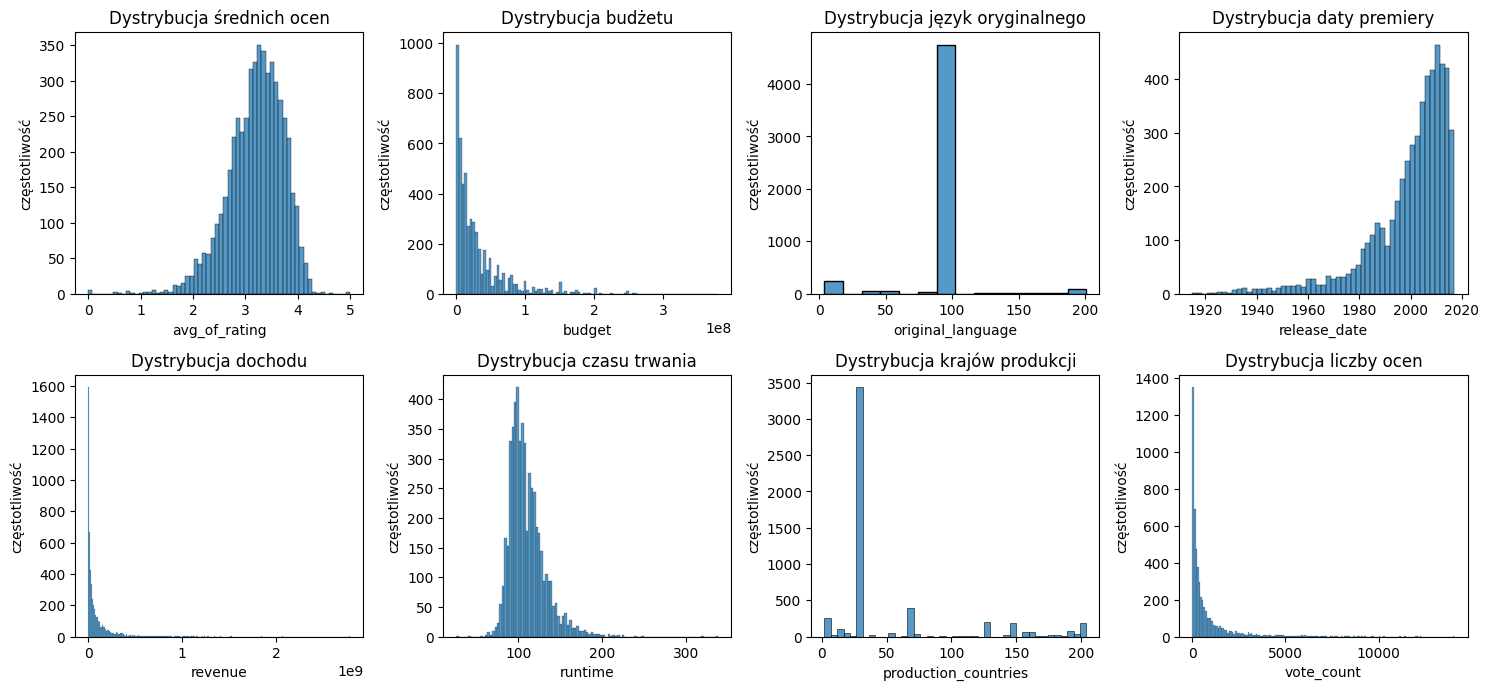

In [2]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    if col == "release_date":
        sns.histplot(movies_df[col]/100)
    else:
        sns.histplot(movies_df[col])
    plt.title(f'Dystrybucja {polish_column_names[i-1]}')
    plt.xlabel(col)
    plt.ylabel('częstotliwość')

plt.tight_layout()
plt.show()

##### Średnia ocena

Częstotliwość średnich posiada rozkład normalny. Jest to zrozumiałe, jak większość zjawisk w przyrodzie, społeczeństwie, najczęściej spotykanę są filmy przeciętne, z oceną około 3. 

##### Dystrybucja budżetu

Znacząca większość filmów posiada budżet poniżej 100 milionów dolarów, najczęscięj występuje około milion dolarów. Nieliczne produkcje posiadają budżet dochodzący nawet do 250 dolarów. Na histogramie odstępy miedzy odcinkami na odciętej wynoszą 10^8

##### Dystrybucja częstotliwości języka orginalnego

Najczęściej spotykanym ID języka jest to należące do angielskiego. Nie jest to zaskoczeniem, jako że jest to język międzynarodowy. 

##### Dystrybucja roku premiery

Zauważyć na tym histogramie można tendencję wzrostową, wraz z biegiem lat coraz więcej filmów jest produkowanych. W dodatku premiera nowego dzieła potencjalnie przyciąga uwagę klientów.  

##### Dystrybucja dochodu

Wiele filmów posiada 

##### Dystrybucja czasu trwania

Najczęściej pojawiającą się wartością jest bez niespodzianki 90 minut, co jest popularną wartością dla większości filmów pełnometrażowych, animacji etc.

##### Kraj produkcji

Od kraju produkcji zależą studia, które mogły produkować film i sceneria. 

##### Dystrybucja ilości głosów na osobę

Histogram jednoznacznie pokazuje, że większość użytkowników zostawia od kilku do kilkunastu ocen. 

#### Tendencja przychodu na przestrzeni lat

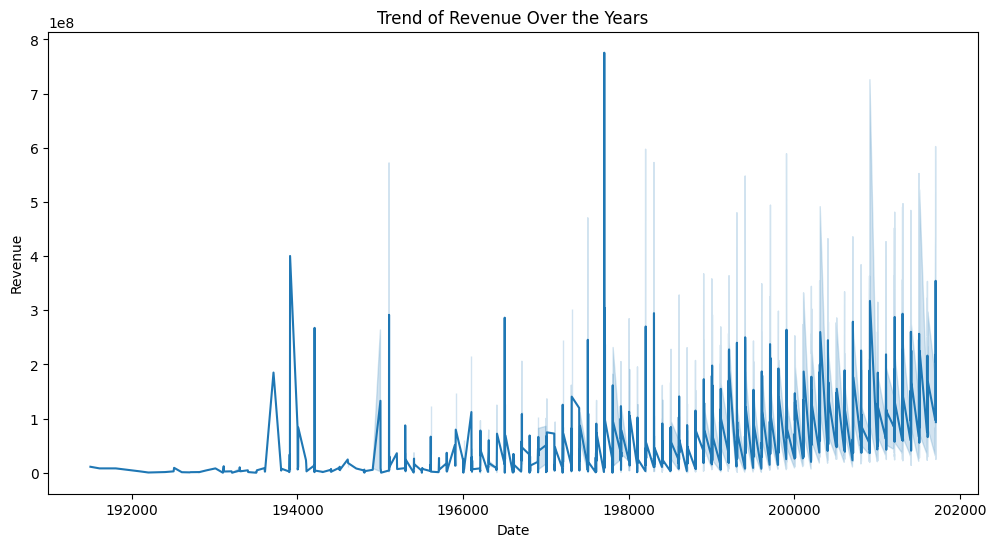

In [3]:
# Plotting the trend of worldwide gross revenue over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='revenue', data=movies_df)
plt.title('Trend of Revenue Over the Years')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

#### Tendencja budżetu na przestrzeni lat

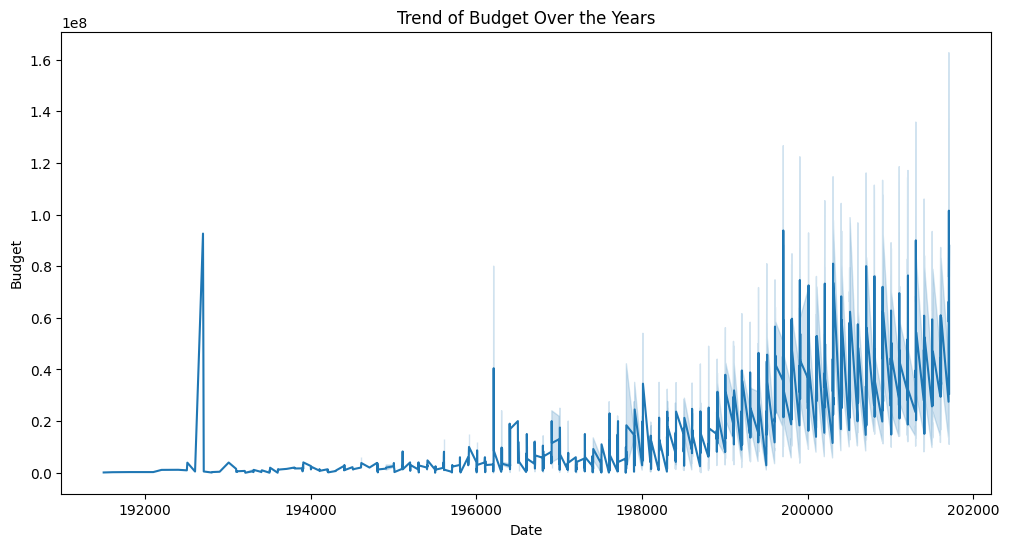

In [4]:
# # Plotting the trend of budget over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='budget', data=movies_df)
plt.title('Trend of Budget Over the Years')
plt.xlabel('Date')
plt.ylabel('Budget')
plt.show()

#### Relacja między budżetem, a przychodem

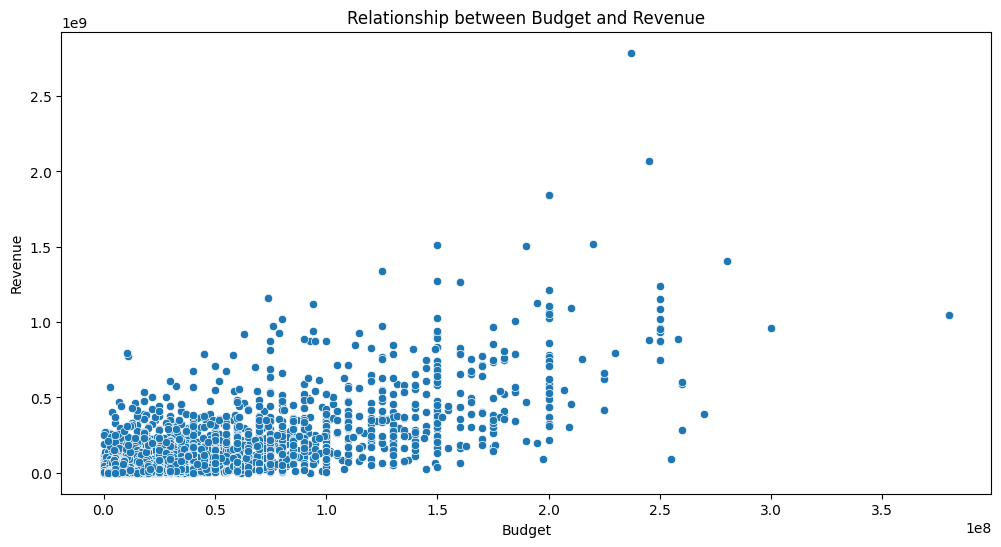

In [5]:
# Plotting the relationship between budget and worldwide gross revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(x='budget', y='revenue', data=movies_df)
plt.title('Relationship between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

#### Relacja między budżetem, a średnią oceną

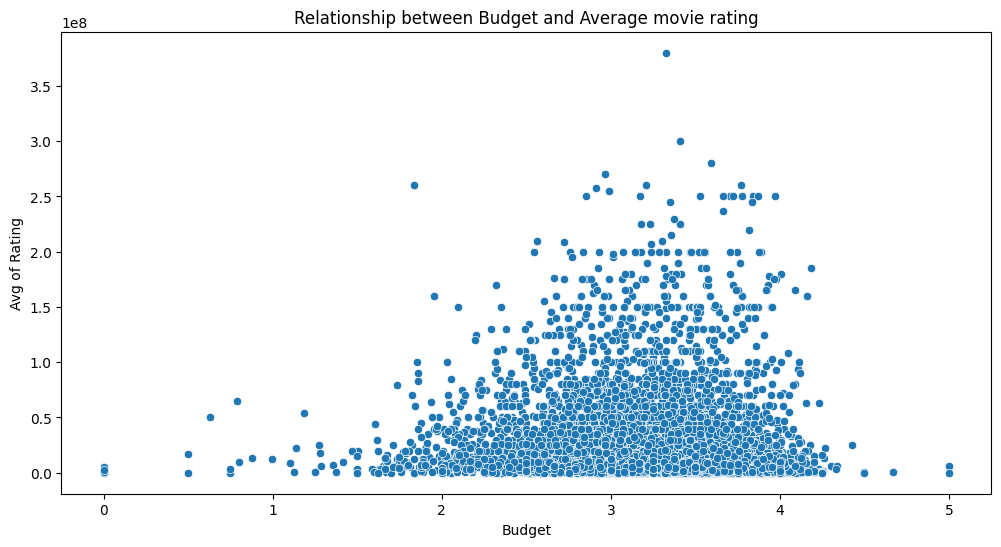

In [6]:
# Plotting the relationship between domestic and international gross revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(x='avg_of_rating', y='budget', data=movies_df)
plt.title('Relationship between Budget and Average movie rating')
plt.xlabel('Budget')
plt.ylabel('Avg of Rating')
plt.show()

#### Statystyki opisowe

In [7]:
data = [[] for _ in range(len(numerical_columns))]

for i, col in enumerate(numerical_columns, 1):
    data[i-1].append(col)
    data[i-1].append(round(movies_df[col].mean(), 2))
    data[i-1].append(round(movies_df[col].median(), 2))
    data[i-1].append(round(movies_df[col].min(), 2))
    data[i-1].append(movies_df[col].max())
    data[i-1].append(round(movies_df[col].std(), 2))
    data[i-1].append(round(movies_df[col].var(), 2))
    data[i-1].append(round(movies_df[col].sum(), 2))
    data[i-1].append(round(movies_df[col].count(), 2))
    data[i-1].append(round(movies_df[col].quantile(0.25), 2))
    data[i-1].append(round(movies_df[col].skew(), 2))

# tworzenie DataFrame z danymi statystycznymi i polskimi nazwami kolumn
pd.DataFrame(data, columns=["Kolumna", "Średnia", "Mediana", "Minimum", "Maksimum", "Odchylenie standardowe", "Wariancja", "Suma", "Liczba wartości", "Kwartyl 1", "Skośność"])

,Kolumna,Średnia,Mediana,Minimum,Maksimum,Odchylenie standardowe,Wariancja,Suma,Liczba wartości,Kwartyl 1,Skośność
0,avg_of_rating,3.20,3.26,0.0,5.000000e+00,5.300000e-01,2.800000e-01,1.692287e+04,5289,2.88,-0.85
1,budget,31521904.98,17000000.00,1.0,3.800000e+08,4.034756e+07,1.627925e+15,1.667194e+11,5289,5800000.00,2.50
2,original_language,97.05,100.00,4.0,2.010000e+02,2.450000e+01,6.001000e+02,5.132840e+05,5289,100.00,-0.93
3,release_date,199990.36,200411.00,191502.0,2.017080e+05,1.575120e+03,2.480991e+06,1.057749e+09,5289,199407.00,-1.83
4,revenue,91774904.13,30822861.00,1.0,2.787965e+09,1.671951e+08,2.795419e+16,4.853975e+11,5289,7600000.00,4.45
5,runtime,110.13,106.00,26.0,3.380000e+02,2.151000e+01,4.624900e+02,5.824580e+05,5289,95.00,1.64
6,production_countries,52.76,27.00,2.0,2.040000e+02,5.331000e+01,2.842200e+03,2.790390e+05,5289,27.00,1.69
7,vote_count,744.62,285.00,1.0,1.407500e+04,1.258790e+03,1.584547e+06,3.938277e+06,5289,83.00,3.70


### Braki danych

Spotkaliśmy się z wieloma brakami danych, przede wszystkim w kolumnie revenue i budget (przychód i budżet). Aby stworzony przez nas model był jak najbardziej dokładny, owe rekordy z brakami zostały usunięte. Posiadana ilość danych jest na tyle wysoka, że możemy na to sobie pozwolić. 

### Obserwacje odstające

Ze względu na specyfikę i różnorodność produkcji filmowych, postanowiliśmy nie usuwać odstających danych, nie zaszła taka potrzeba.  

## Wykorzystane metody

### Metoda k-średnich

Algorytm k-średnich można opisać w trzech punktach:
1. Punktem wyjścia jest podział danego zbioru obiektów na k podzbiorów
(najczęściej generowany poprzez przypisanie każdego elementu do „najbliższego”
wstępnie wybranego przedstawiciela k grup).
2. Wyznaczane są środki ciężkości każdej grupy w przestrzeni zmiennych diagnostycznych.
3. Przypisujemy każdy element do najbliższego środka ciężkości, po czym powracamy do punktu 2, jeżeli choć jeden element został przeniesiony do innej grupy.


## Wnioski

## Bibliografia